# Paralelización de la evaluación de los parámetros para un clasificador tipo Random Forest

Este ejercicio se trata de evaluar un conjunto de hiperparámetros para un clasiicador tipo Random Forest.

Los hiperparámetros que se se van a variar son:
- El número de árboles (10-210) 
- El criterio para realizar la partición del conjunto de datos (entropy, gini)


In [1]:
# Import the necessary dependencies
import multiprocessing
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# We can see the number of cores in the computer 
cores = multiprocessing.cpu_count()
print('Cores in the computer:', cores)

Cores in the computer: 4


In [3]:
# We create a list with the parameters to be evaluated 
hyperparameters = []
for criterion in ['gini','entropy']:
    for trees in range(10, 210):
        hyperparameters.append([trees, criterion])

The dataset will be splitted in 80% for the training and 20% for the testing stages


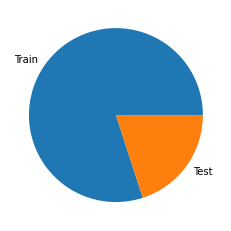

In [4]:
print('The dataset will be splitted in 80% for the training and 20% for the testing stages')
plt.pie(np.array([80,20]), labels=['Train', 'Test'])
plt.show()

In [5]:
# We load the dataset, here we use 80-20 for training and testing splits
iris=datasets.load_iris()
X=iris.data
y=iris.target
# se particiona el conjunto en 80-20 para la evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

In [6]:
def evaluate_hyperparameters(trees, criterion):
    """
    Evaluate hyperparameters of a random forest
    Args:
    trees: number of trees in the random forest
    criterion: criterion for the dataset partition
    """
    clf=RandomForestClassifier(n_estimators=int(trees), criterion=criterion)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

In [7]:
def evaluate_set(hyperparameter_set):
    """
    Evaluate a set of hyperparameters
    Args:
    hyperparameter_set: a list with the set of hyperparameters to be evaluated
    """
    for s in hyperparameter_set:
        evaluate_hyperparameters(s[0], s[1])  

In [8]:
start_time = time.perf_counter()
evaluate_set(hyperparameters)
finish_time = time.perf_counter()
print(f"Program finished in {finish_time-start_time} seconds")

Program finished in 63.0739398780006 seconds


In [9]:
# Now we will evaluated with more threads
threads=[]
N_THREADS=2
splits=np.split(np.array(hyperparameters), N_THREADS)
for i in range(N_THREADS):
    threads.append(multiprocessing.Process(target=evaluate_set, args=[splits[i]]))


start_time = time.perf_counter()
for thread in threads:
    thread.start()
    
for thread in threads:
    thread.join()
            
finish_time = time.perf_counter()
print(f"Program finished in {finish_time-start_time} seconds")

Program finished in 35.59445258899905 seconds
